<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np

In [0]:
# TODO

# Survival status (class attribute)
#   1 = the patient survived 5 years or longer
#   2 = the patient died within 5 year


# import url dtata and read into csv

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"


df = pd.read_csv(url, header=None )

#columns need names tooo

df.columns = [

"age_of_patient",
"year_of_operation",
"number_of_positive_axillary_nodes_detected",
"survival_status",

]

df.describe()

#copy of original datatset
dfc =df

In [0]:
dfc.head(10)

,age_of_patient,year_of_operation,number_of_positive_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [0]:
df.shape # matches NOI: 306 and ATTRIB: 4 

(306, 4)

In [0]:
# TODO
df.isna().sum()

age_of_patient                                0
year_of_operation                             0
number_of_positive_axillary_nodes_detected    0
survival_status                               0
dtype: int64

In [0]:
df['survival_status']  = [ 1 if x == 1 else 0 for x in df['survival_status'] ] # list comp to create 1 or 0

In [0]:
dfc2 = df
df.head(10)

,age_of_patient,year_of_operation,number_of_positive_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

# some areas of concern may be  
  - if age corresponds to survival rate
  - if the operation has become more survivable over the years
  - if the the amount of axillary nodes are correlated to survival rates

if survival is similarly distributed across these features, we can assume that any predictions drawn from the dataset are spurious from selection bias, basically regardless of factors you are either going survive, more than likely, or not survive more likely than not

In [0]:
df['year_of_operation'].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year_of_operation, dtype: float64

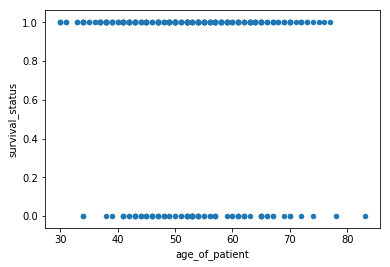

In [0]:
# Pandas Scatterplot
df.plot.scatter('age_of_patient', 'survival_status' );

In [0]:
crosstab = pd.crosstab(df['survival_status'], df['age_of_patient'])
crosstab

age_of_patient,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83
survival_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,0,0,1,1,0,3,2,4,3,3,4,3,3,2,2,2,4,6,4,2,2,3,0,1,2,3,3,1,0,4,2,2,0,1,2,0,1,0,1,0,0,0,1,1
1,3,2,2,5,2,2,6,9,5,3,7,7,7,4,6,3,8,4,8,10,4,10,5,9,8,5,8,7,7,4,6,4,7,5,6,3,4,2,3,5,1,3,2,1,1,1,1,0,0


In [0]:
#creating bins for the clarity
age_bins = pd.cut(df['age_of_patient'], 5)
pd.crosstab( df['survival_status'], age_bins, normalize='columns')

# suggest survivibility is likely across age groups, though it does decrease significantly with age

age_of_patient,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
survival_status,,,,,
0,0.093023,0.313131,0.28125,0.271186,0.333333
1,0.906977,0.686869,0.71875,0.728814,0.666667


# lets look at some other factors

In [0]:
df['number_of_positive_axillary_nodes_detected'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: number_of_positive_axillary_nodes_detected, dtype: float64

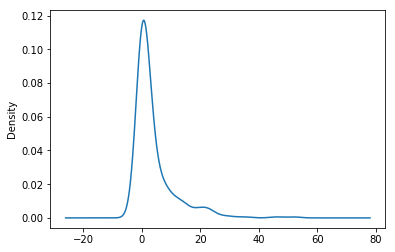

In [0]:
# Pandas Scatterplot of the typical PAN count
df['number_of_positive_axillary_nodes_detected'].plot.density()

In [0]:
pan_bin = pd.cut(df['number_of_positive_axillary_nodes_detected'], 3)
pd.crosstab( df['survival_status'], pan_bin, normalize='columns')
# looking like the amount of PAN severly reduces survivorbility the higher the count

number_of_positive_axillary_nodes_detected,"(-0.052, 17.333]","(17.333, 34.667]","(34.667, 52.0]"
survival_status,,,
0,0.244755,0.529412,0.666667
1,0.755245,0.470588,0.333333


# Since survivability is clearly not constant across age, or axillary node count, we can make good predictions about survivablitity from those two features

# But let us look at one more factor, year, to see if the survivability has increased across the years

In [0]:
df['year_of_operation'].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year_of_operation, dtype: float64

In [0]:
op_year = pd.cut(df['year_of_operation'], 4)
pd.crosstab( df['survival_status'], op_year, normalize='columns') 

year_of_operation,"(57.989, 58.733]","(58.733, 59.467]","(59.467, 60.2]","(60.933, 61.667]","(61.667, 62.4]","(62.4, 63.133]","(63.867, 64.6]","(64.6, 65.333]","(65.333, 66.067]","(66.8, 67.533]","(67.533, 68.267]","(68.267, 69.0]"
survival_status,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


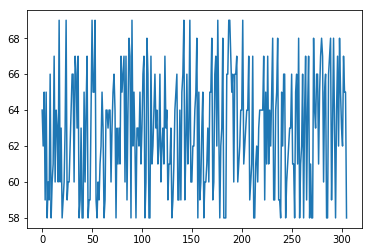

In [0]:
df['year_of_operation'].plot()


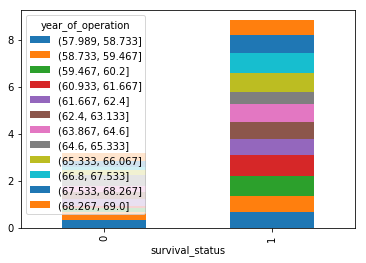

In [0]:

import seaborn as sns
import matplotlib.pyplot as plt


ct = pd.crosstab( df['survival_status'], op_year, normalize='columns') 

ct.plot.bar(stacked=True)
plt.legend(title='year_of_operation')

plt.show()

# The year the surgery was performed shows NO correlation with survivor rates! 

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
# TODO
split_survivors = {k: v for k, v in df.groupby('survival_status')}




In [0]:
split_survivors[1].head()

In [0]:
split_survivors[0].head()

In [0]:
ss0 = split_survivors[0].plot.scatter('age_of_patient', 'number_of_positive_axillary_nodes_detected')
ss1 = split_survivors[1].plot.scatter('age_of_patient', 'number_of_positive_axillary_nodes_detected')





# Graph 0 shows trend in higher distribution of PAN in group 0, which correlates with the crosstab earlier that says higher PAN count = higher mortality rate

# Graph 1 shows a distribution that correlates with the crosstabs that says the survivibility of the opertaion is fairly like in patients. 

# Spurious correlation is middle age people tend to have higher rate of PAN

In [0]:
ss0 = split_survivors[0].plot.scatter('age_of_patient', 'number_of_positive_axillary_nodes_detected', color='orange', label='Group 0')
split_survivors[1].plot.scatter('age_of_patient', 'number_of_positive_axillary_nodes_detected', color='DarkGreen', label='Group 1', ax=ss0)





## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

In [0]:
# Any Supplemental Code for Analysis Here

#1 I do not think any thing increases with survival
    # at least what i have gleamed is that the younger a person is, the more likely their survival, and the the less PAN count is, the less likelt mortality is
    # so i am drawing a blank as to what increases with with survival, given the year it is performed is negligible

In [0]:
#2 Age

#creating bins for the clarity
age_bins = pd.cut(df['age_of_patient'], 5)
pd.crosstab( df['survival_status'], age_bins, normalize='columns')

# as age goes down survivalbilty clearly increases

In [0]:
#3

# since age and PAN count seem to be the biggest factors in survival, we can say that Survival likely depends on either the age of the patient, or the PAN count, not both though
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++